# Flights Data Exploration Challenge

In this challenge, I will explore a real-world dataset containing flights data from the US Department of Transportation.

To begin my analysis, I need to load the flight dataset and take a quick look at its structure. This will help me understand what kind of information is available and whether any data cleaning might be needed.

First, I import pandas, a powerful library for data manipulation, and load the dataset using pd.read_csv(). I will then display some basic information about the dataset to get an overview of its contents.


In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()  # View first few rows


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [2]:
df_flights.info() # Check Data Structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

My aim is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.


#### Cleaning Data

Before diving into the analysis, I need to clean the data to ensure missing values and outliers don’t distort the results.

I’ll first check for missing values and decide whether to fill or remove them, as incomplete data can impact accuracy. Then, I’ll identify outliers in DepDelay and ArrDelay using boxplots to determine if extreme delays should be adjusted or removed.

##### Idenitfying null or missing values 
After reviewing the missing data, I notice that **all rows where `DepDel15` is missing correspond to flights with `DepDelay` of 0**. Since `DepDel15` is a binary indicator of whether a flight was delayed by 15 minutes or more, it makes sense to assume that if `DepDelay` is 0, the missing `DepDel15` value should also be 0.  

To fix this, I will fill the missing values with `0`.

In [3]:
# Identify missing values in each column
df_flights.isnull().sum()    

# Print all rows where any value is missing
print(df_flights[df_flights.isnull().any(axis=1)])  

# Check the values of DepDelay where DelDelay15 is missing
print(df_flights[df_flights.isnull().any(axis=1)]['DepDelay'].unique()) 

# Fill missing values in DepDel15 with 0
df_flights['DepDel15'] = df_flights.DepDel15.fillna(0)

        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
171     2013      4          18          4      DL            10397   
359     2013      5          22          3      OO            11433   
429     2013      7           3          3      MQ            13851   
545     2013      4          13          6      FL            14524   
554     2013      5           8          3      EV            12953   
...      ...    ...         ...        ...     ...              ...   
271410  2013      8           5          1      WN            14831   
271607  2013      6          18          2      EV            14100   
271634  2013      5           8          3      AA            11298   
271671  2013     10           8          2      WN            12892   
271885  2013      5          15          3      US            14771   

                               OriginAirportName         OriginCity  \
171     Hartsfield-Jackson Atlanta International            Atlanta   
359  

In [4]:
# Confirm missing values after handling them
print(df_flights.isnull().sum())
print(df_flights.isna().sum())


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64


##### Identifying any outliers in DepDelay and ArrDelay
Now that I have handled missing values, the next step is to identify outliers in departure and arrival delays. Outliers can distort the analysis, making it harder to recognize general trends. To detect them, I will first use boxplots, which help visualize the spread of delay times and highlight extreme values.

In addition to boxplots, I will also generate histograms to examine the distribution of DepDelay and ArrDelay, along with summary statistics to quantify key measures such as the mean, median, and interquartile range (IQR). This will provide a clearer picture of how delays are distributed and whether they follow a specific pattern.

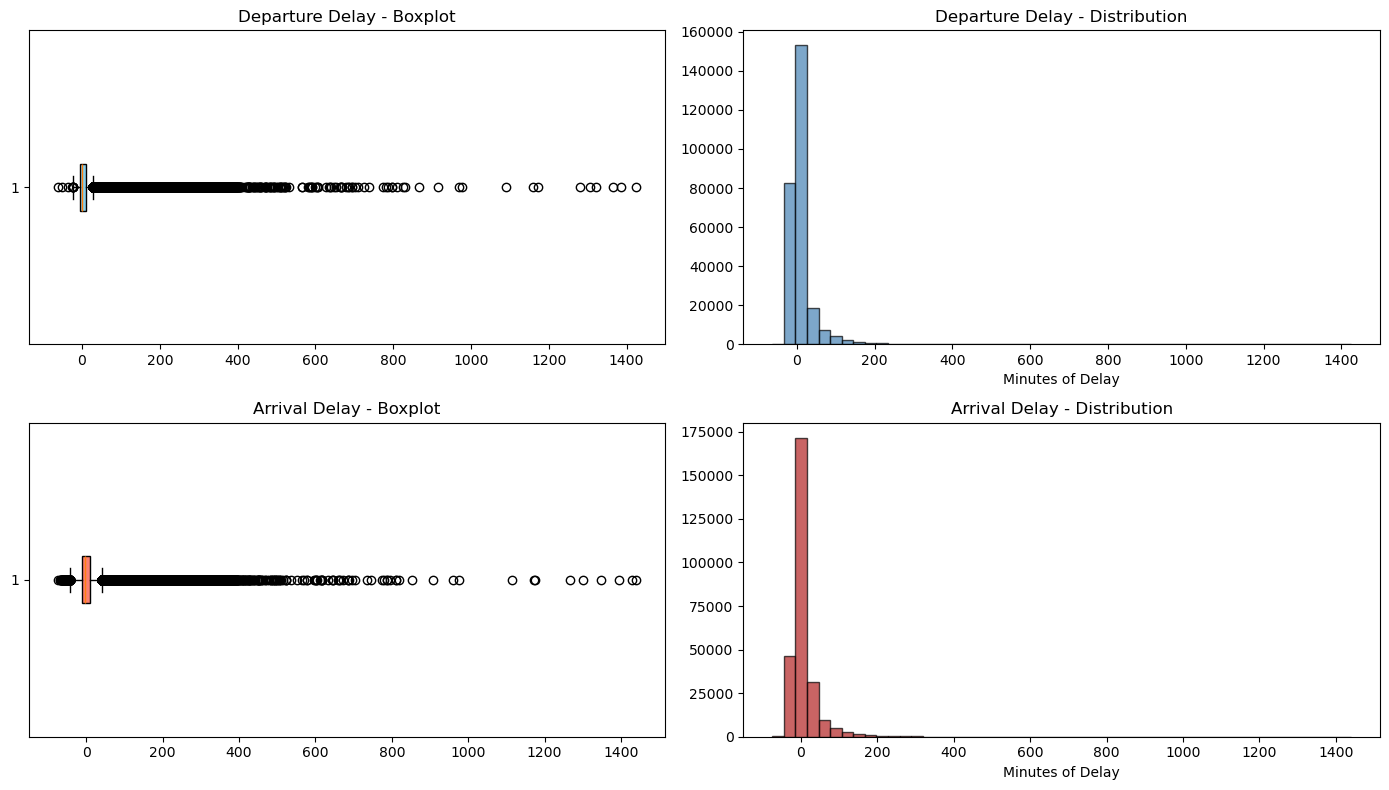

NameError: name 'depdelay' is not defined

In [5]:
# we can look for outliers using boxplots  
%matplotlib inline


import matplotlib.pyplot as plt

def plot_delay_distributions(df, dep_col='DepDelay', arr_col='ArrDelay'):
    """
    Plots boxplots and histograms for departure and arrival delays.

    Parameters:
    df (DataFrame): The dataset containing flight delays.
    dep_col (str): Column name for departure delay.
    arr_col (str): Column name for arrival delay.

    Returns:
    None
    """
    # Create figure with 2 rows and 2 columns
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))

    # Boxplot for Departure Delay
    axes[0, 0].boxplot(df[dep_col], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    axes[0, 0].set_title('Departure Delay - Boxplot')

    # Histogram for Departure Delay
    axes[0, 1].hist(df[dep_col], bins=50, color="steelblue", edgecolor="black", alpha=0.7)
    axes[0, 1].set_title('Departure Delay - Distribution')
    axes[0, 1].set_xlabel('Minutes of Delay')

    # Boxplot for Arrival Delay
    axes[1, 0].boxplot(df[arr_col], vert=False, patch_artist=True, boxprops=dict(facecolor="salmon"))
    axes[1, 0].set_title('Arrival Delay - Boxplot')

    # Histogram for Arrival Delay
    axes[1, 1].hist(df[arr_col], bins=50, color="firebrick", edgecolor="black", alpha=0.7)
    axes[1, 1].set_title('Arrival Delay - Distribution')
    axes[1, 1].set_xlabel('Minutes of Delay')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()


plot_delay_distributions(df_flights)
# Summary Statistics
print("\nSummary Statistics for Departure Delay:\n", depdelay.describe())
print("\nSummary Statistics for Arrival Delay:\n", arrdelay.describe())

The summary statistics and boxplots show that most flights depart on time or early, with a median departure delay of -1 minute and a median arrival delay of -3 minutes. However, the dataset contains extreme outliers, with some flights experiencing delays over 24 hours. These extreme values inflate the mean delay and can distort the analysis.

To handle this, I will apply percentile-based trimming, keeping only flights where the delay falls between the 1st and 90th percentiles. This method ensures that I remove the most extreme outliers while preserving the majority of realistic delays, making the analysis more reliable without discarding too much valid data. This will keep 98% of the dataset and only remove the most extreme delays at both ends.

In [ ]:
# Define percentile thresholds
lower_dep = df_flights['DepDelay'].quantile(0.01)  # 1st percentile
upper_dep = df_flights['DepDelay'].quantile(0.90)  # 90th percentile

lower_arr = df_flights['ArrDelay'].quantile(0.01)  # 1st percentile
upper_arr = df_flights['ArrDelay'].quantile(0.90)  # 90th percentile

# Trim data to exclude extreme outliers
df_flights_trimmed = df_flights[
    (df_flights['DepDelay'] >= lower_dep) & (df_flights['DepDelay'] <= upper_dep) &
    (df_flights['ArrDelay'] >= lower_arr) & (df_flights['ArrDelay'] <= upper_arr)
]

# Check new summary statistics
plot_delay_distributions(df_flights_trimmed)
print(df_flights_trimmed[['DepDelay', 'ArrDelay']].describe())

After applying the 1st and 90th percentile trimming, the dataset now contains 237,105 flights, meaning that only the most extreme delays were removed.

The mean departure delay dropped from 10.35 minutes to 1.31 minutes, showing that extreme delays were inflating the original average.
The standard deviation significantly decreased for both DepDelay (from 35.67 to 9.33) and ArrDelay (from 38.23 to 13.14), meaning the dataset is now less skewed by extreme values.
The maximum delay values were capped at 37 minutes for departures and 38 minutes for arrivals, removing extreme 1000+ minute delays while keeping meaningful variations.
Overall, this adjustment makes the data more representative of typical flight delays, ensuring that insights drawn from it are reliable and not overly influenced by a small number of extreme cases.

#### Explore Clean Data

Now that I have cleaned the data and handled outliers, I will analyze patterns and trends in flight delays using summary statistics, aggregation functions, and visualizations. The key questions I will explore are:

- *What are the average (mean) departure and arrival delays?*
- *How do the carriers compare in terms of arrival delay performance?*
- *Is there a noticable difference in arrival delays for different days of the week?*
- *Which departure airport has the highest average departure delay?*
- *Do **late** departures tend to result in longer arrival delays than on-time departures?*
- *Which route (from origin airport to destination airport) has the most **late** arrivals?*
- *Which route has the highest average arrival delay?*

By answering these questions, I will uncover patterns in flight delays and identify key factors that contribute to them.

In [ ]:
df_flights = df_flights_trimmed
df_flights.describe()

##### What are the average (mean) departure and arrival delays?

In [ ]:
# Calculate mean departure and arrival delays
mean_depDelay = df_flights.DepDelay.mean()
mean_arrDelay = df_flights.ArrDelay.mean()

print(f'Average Departure Delays: {mean_depDelay} \nAverage Arrival Delays: {mean_arrDelay}')

##### How do the carriers compare in terms of arrival delay performance?

To compare how different airlines perform in terms of arrival delays, I will calculate:

- Total flights per carrier
- The fraction of flights that were delayed (arrival delay > 0 minutes)
- The fraction of flights delayed by more than 15 minutes

This will help identify which carriers are most reliable and which ones tend to experience frequent or severe delays.

In [ ]:
# Calculate total flights per carrier
carriers = df_flights.groupby('Carrier').size().reset_index(name='Total Flights')

# Calculate total delayed flights (arrival delay > 0)
delayed_by_carriers = df_flights.groupby('Carrier').agg(total_delay=('ArrDelay', lambda x: (x > 0).sum()))

# Merge with total flights data
carriers = carriers.merge(delayed_by_carriers, on='Carrier', how='left')

# Calculate flights delayed by more than 15 minutes
delay_15 = df_flights.groupby('Carrier').agg(delay_over_15=('ArrDelay', lambda x: (x >= 15).sum()))

# Merge with previous dataset
carriers = carriers.merge(delay_15, on='Carrier', how='left')

# Compute delay fractions
carriers['delay_fraction'] = carriers['total_delay'] / carriers['Total Flights']  # Fraction of delayed flights
carriers['delay_15_fraction'] = carriers['delay_over_15'] / carriers['total_delay']  # Fraction of flights delayed >15 min

# Display results
print(carriers)



In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Define x-axis positions for bars
x = np.arange(len(carriers))
bar_width = 0.35

# Create a figure
fig, ax = plt.subplots(figsize=(15,6))

# Plot the bars
ax.bar(x - bar_width/2, carriers['delay_fraction'], width=bar_width, label='Total fraction of flights delayed', color='red')
ax.bar(x + bar_width/2, carriers['delay_15_fraction'], width=bar_width, label='Total fraction of flights delayed >15min', color='green')

# Formatting
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(carriers['Carrier'], rotation=45)

plt.title('Flight Delay Performance by Carrier')
plt.ylabel('Fraction of Delayed Flights')
plt.xlabel('Carrier')

plt.show()

- Bar Chart Analysis : The red bars represent the total fraction of delayed flights for each carrier.
and the green bars represent the fraction of delayed flights that were delayed for more than 15 minutes.
Carriers with high red and green bars (e.g., F9, WN) tend to have frequent and severe delays.
Some carriers (e.g., HA) have a lower fraction of total delays, suggesting better on-time performance.
Airlines where the green bar is much smaller than the red bar indicate that most of their delays are short (less than 15 minutes).

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one for departure delay, one for arrival delay)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Boxplot for Departure Delay by Carrier
axes[0].boxplot([df_flights[df_flights['Carrier'] == carrier]['DepDelay'] for carrier in carriers['Carrier']],
                labels=carriers['Carrier'], vert=False, patch_artist=True)
axes[0].set_title('Departure Delay Distribution by Carrier')
axes[0].set_xlabel('Minutes of Delay')
axes[0].set_ylabel('Carrier')

# Boxplot for Arrival Delay by Carrier
axes[1].boxplot([df_flights[df_flights['Carrier'] == carrier]['ArrDelay'] for carrier in carriers['Carrier']],
                labels=carriers['Carrier'], vert=False, patch_artist=True)
axes[1].set_title('Arrival Delay Distribution by Carrier')
axes[1].set_xlabel('Minutes of Delay')
axes[1].set_ylabel('Carrier')

# Adjust layout for better readability
plt.tight_layout()
plt.show()



- Boxplot Analysis: The departure delay boxplot shows that most airlines have a compact distribution with relatively short delays, but some carriers exhibit significant outliers, meaning they frequently experience extreme delays.
The arrival delay boxplot follows a similar trend, with some airlines consistently arriving late, while others show a more balanced distribution, including early arrivals (negative values). Most flights have similar spread in their arrival delays. 
Airlines with a longer interquartile range (IQR) in the boxplots tend to have higher delay variability, meaning their performance is inconsistent - examples of such airlines are WN for Delays in Departure. Overall, there is a greater spread in arrival delays than in departure delays.


##### Is there a noticable difference in arrival delays for different days of the week?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

# Group data by Day of the Week
days = df_flights.groupby('DayOfWeek').size().reset_index(name='Total Flights')
days_no_delayed = df_flights.groupby('DayOfWeek').agg(no_delayed=('ArrDelay', lambda x: (x > 0).sum()))
days_total_delayed = df_flights.groupby('DayOfWeek').agg(total_delay_time=('ArrDelay', lambda x: x.sum()))
days_no_15delayed = df_flights.groupby('DayOfWeek').agg(no_delayed=('ArrDelay', lambda x: (x >= 15).sum()))

# Merge all data into one DataFrame
dfs = [days, days_no_delayed, days_no_15delayed, days_total_delayed]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='DayOfWeek', how='inner'), dfs)

# Calculate percentage of flights delayed
merged_df['Total:delayed'] = (merged_df['no_delayed_x'] / merged_df['Total Flights']) * 100
merged_df['Total:15delayed'] = (merged_df['no_delayed_y'] / merged_df['Total Flights']) * 100

# Display the merged DataFrame
print(merged_df)

In [ ]:
# Create bar chart for delays by day of the week
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(merged_df['DayOfWeek'], merged_df['Total:delayed'], label='Total Flights Delayed', color='blue')
ax.bar(merged_df['DayOfWeek'], merged_df['Total:15delayed'], label='Flights Delayed > 15 min', color='orange')

# Formatting
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Percentage of Flights Delayed')
ax.set_title('Total Delayed Flights and Delayed > 15 minutes per Day')
ax.legend()

plt.show()

- Bar Chart Analysis: Flight delays fluctuate across different days, with days 4 and 5 (likely Thursday and Friday) showing the highest percentage of delayed flights.
Day 6 (likely Saturday) has the lowest percentage of delays, indicating that weekend flights may be more punctual. The orange portion of the bars represents flights delayed by more than 15 minutes.
Days 4 and 5 have the highest number of severe delays, which might indicate congestion leading into the weekend.
Days 2 and 6 have fewer severe delays, suggesting smoother operations on those days.

In [ ]:
# Create boxplots for arrival delays by day of the week
plt.figure(figsize=(12, 6))
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', vert=False, patch_artist=True)

plt.title('Arrival Delay Distribution by Day of the Week')
plt.xlabel('Minutes of Delay')
plt.ylabel('Day of the Week')
plt.suptitle('')  # Removes default Matplotlib title
plt.show()

- Boxplot Analysis : The green median lines in each boxplot indicate the typical arrival delay per day.
The medians are fairly consistent across all days, suggesting no single day has drastically worse delays. All days show several extreme outliers, indicating that long delays (30+ minutes) occur across all weekdays.
Days 4 and 5 again have a wider range, confirming higher delay variability towards the end of the week.

Overall :
Thursdays and Fridays have the most delays, possibly due to increased travel demand leading into the weekend.
Saturdays have fewer delays, making them a good choice for on-time arrivals.
While most delays are short, outliers exist across all days, meaning occasional extreme delays affect all weekdays.

##### Which departure airport has the highest average departure delay?

In [39]:
# Group by origin airport and calculate mean departure delay
airport_delay = df_flights.groupby('OriginAirportName').agg(mean_delay=('DepDelay', 'mean'))

# Sort airports by highest mean delay
airport_delay.sort_values('mean_delay', ascending=False, inplace=True)

# Display the airport with the highest average departure delay
highest_delay_airport = airport_delay.head(1)
airport_name = highest_delay_airport.index[0]
print(f'The departure airport with the highest average departure delay is {airport_name}')


The departure airport with the highest average departure delay is Chicago O'Hare International


##### Do late departures tend to result in longer arrival delays than on-time departures?

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

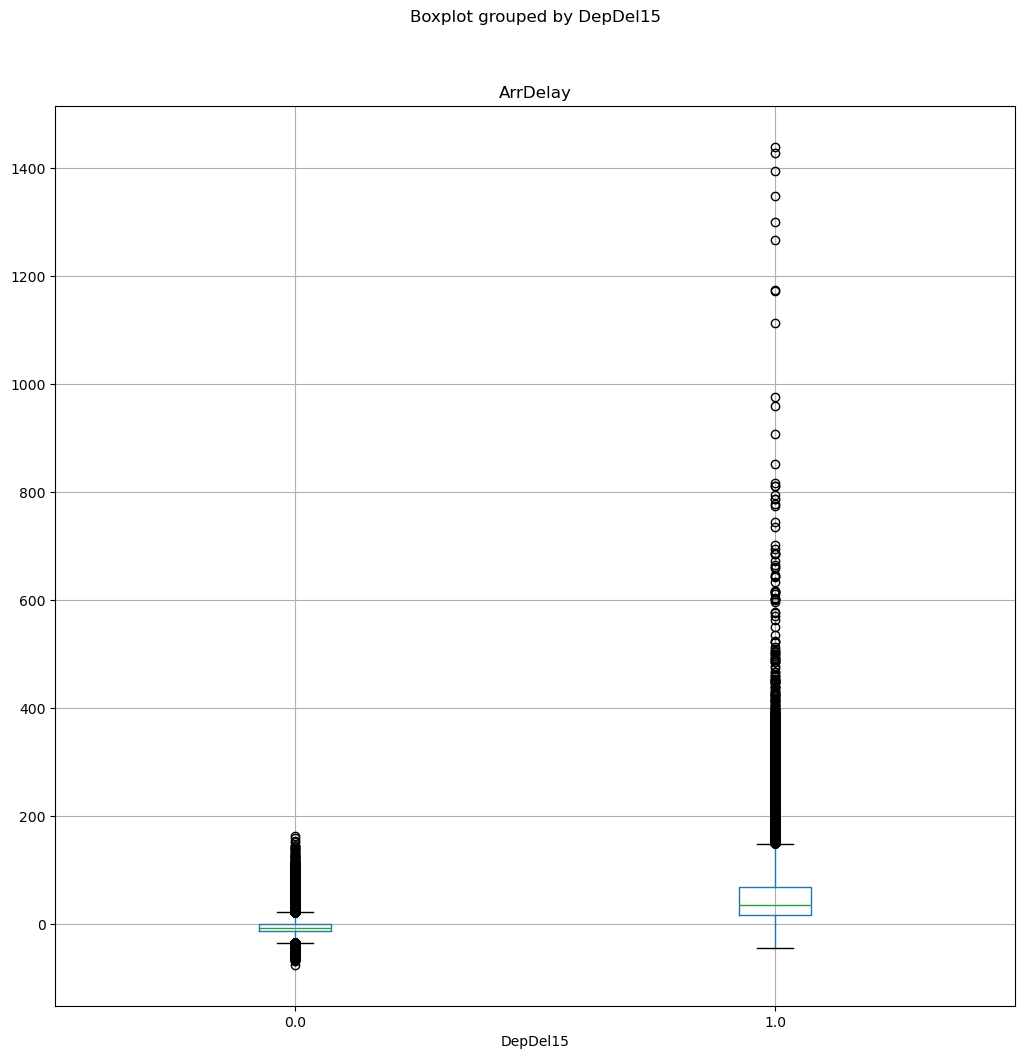

In [31]:
df_flights.boxplot(column='ArrDelay', by = 'DepDel15', figsize=(12,12))

We see that the flights that have had departures later than 15 have a far more varied range of arrival delays compared to those which were not delayed past 15 min. 

##### Which route (from origin airport to destination airport) has the most late arrivals?

In [35]:
# For each origin and destinamtion airport pair, we count the number of late arrivals
routes = df_flights.groupby(['OriginAirportName','DestAirportName']).agg(late_arrivals_number=('ArrDelay', lambda x : (x>0).sum()))

routes.sort_values('late_arrivals_number', ascending = False, inplace = True)
most_late = routes.head(1)
origin, destination = most_late.index[0]                                              
print(f'Route with most late arrivals: {origin} -> {destination}')

Route with most late arrivals: Los Angeles International -> San Francisco International


##### Which route has the highest average arrival delay?

In [45]:
routes2 = df_flights.groupby(['OriginAirportName','DestAirportName']).agg(avg_arrival_del = ('ArrDelay', lambda x: x.mean()) )

routes2.sort_values('avg_arrival_del', ascending = False, inplace = True)
most_avg_delay = routes.head(1)
origin, destination = most_avg_delay.index[0]
print(f'Route with highest arrival delay is: {origin} -> {destination}')


Route with highest arrival delay is: Southwest Florida International -> Denver International
